<h1><center> PPOL 5203 Data Science I: Foundations <br><br> 
<font color='grey'> Parsing Unstructure Digital Data. Scraping Part II - Selenium <br><br>
Tiago Ventura </center> <h1> 

---

## Learning Goals

In the class today, we will learn how to use selenium for research purposes. Selenium will allow us to: 

- Webscrap dynamic websites
- Imitate human behavior online

In [1]:
# setup
import requests
import os
import pandas as pd

### Static vs Dynamic web pages

**Static web pages**: when the browser and the source code content match each other. Everything you see in your browser matchs as source html code. For these type of pages, scrapping can be accomplished using:

- string methods and regex 
- beautifulsoup
- scrapy

**Dynamic web pages**: when the content we are viewing in our browser does not match the content we see in the HTML source code we are retrieving from the site/ There are two approaches to scraping a dynamic webpage:

- Scrape the content directly from the JavaScript
- Scrape the website as we view it in our browser — using Python packages capable of executing the JavaScript.

### Selenium

**Definition:** Selenium is an open source tool which is used for automating web browser testing. It allows us to write script in any known programming languages like Java, Python, C# etc. It works across all major OS and also works on all major web browsers. 

Selenium works by automating browsers to execute JavaScript to display a web page as we would normally interact with it. By doing so, we can scrape the web pages as we see it, even though their HTML source is not there!

We will use selenium for data science purposes with two different approaches: 

- Collect data from dynamic websites (such as Youtube, Zillow, Toutiao, among others)

- Interact with websites, and potentially conduct algorithmic studies of recommendations systems.  

Since you already know the basics of html, we will jump straight to using selenium to scrap and interact with dynamic websites

### Installing Selenium

Setting up selenium on your environment can be a bit tricky. First, you need to install the selenium library in Python. Second, you need to download the selenium webdriver. It is a browser-dependent executable file that acts as a bridge between your script and the browser. 

See here instructions to set up your selenium environment: https://selenium-python.readthedocs.io/installation.html

Most importantly, we can use the Web Driver Manager library in Python (https://pypi.org/project/webdriver-manager/) to help us set our selenium environment up. 

In [2]:
# setup
#!pip install selenium
#!pip install webdriver-manager

# open selenium from a path
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

# import other packages
import json
import time
import re
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [29]:
# call driver
from selenium.webdriver.chrome.options import Options
options = Options()
#options.add_argument('--headless')
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()),
                                      options=options)

In [30]:
driver.close()

### Scraping Data with Selenium

To scrape data with selenium, our workflow will usually involve: 

- Navigate to a page using `.get()` method
-  Define which elements we are interested in collecting. Elements are all things inside of html tags (`<> element </>`)
- Find the htmls attributes or tags that identify these elements. For this task, we can use:
    - [selector gadget tool](https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb)
    - **inspect elements** in your preferred browser
- Use the `find_element` methods to find an element based on its attributes/value criteria or selector value that we supply in our script. This is the basic structure of this method:
   - `driver.find_element(By.<attribute>, <selector>)`

The `find_element()` methods from the `driver` object receives two inputs: `By.<>` methods for the attributes/tags, and a string with the selector to identify the attributtes/tags. You can use the following attribute with the `By.` method:

- `find_element(By.ID, "id")`
- `find_element(By.NAME, "name")`
- `find_element(By.XPATH, "xpath")`
- `find_element(By.LINK_TEXT, "link text")`
- `find_element(By.PARTIAL_LINK_TEXT, "partial link text")`
- `find_element(By.TAG_NAME, "tag name")`
- `find_element(By.CLASS_NAME, "class name")`
- `find_element(By.CSS_SELECTOR, "css selector")`


See the [selenium documentation page](https://selenium-python.readthedocs.io/locating-elements.html) for a in-depth coverage of the `find_element` and `By` methods


### Scraping a Brazilian Fact-Checking Agency

We will start with an example of using Selenium to Scrape a Brazilian Fact-checking Agency. You do not need to know portuguese for this, just you your translator tool on google to understand what is going on. 

#### Step 1 : Create your web driver

In [31]:
# call driver
from selenium.webdriver.chrome.options import Options
options = Options()
#options.add_argument('--headless')
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()),
                                      options=options)

In [32]:
# close your driver
driver.close()

In [33]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from webdriver_manager.firefox import GeckoDriverManager

driver = webdriver.Firefox(service=FirefoxService(GeckoDriverManager().install()))

In [34]:
driver.close()

#### Step 2 : Navigate to your webpage of interest

In [3]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# send your driver to an website
driver.get("https://lupa.uol.com.br/jornalismo/categoria/verifica%C3%A7%C3%A3o")

# put it to sleep a bit. Give some time to load
time.sleep(15)

#### Step 3: Collect the Data

In [4]:
title = driver.find_elements(By.CSS_SELECTOR,".eRlKZk")
title[0]

<selenium.webdriver.remote.webelement.WebElement (session="61894a258c4638ecd555aaa64083d6ee", element="f.D376324F450BDAC526CF5AD014BF64A4.d.87CF878EE9E65BEECB53E8707623C5EC.e.60")>

Notice the output is a `selenium.webdriver.remote.webelement.WebElement`. This is an `WebElement` class. It symbolizes an HTML element within an HTML document, and similarly to `BeautifulSoup`, it provides us with methods to interact with the html element

See a full descriptions of the `WebElements` methods in this tutorial: https://www.geeksforgeeks.org/element-methods-in-selenium-python/

In [5]:
# see the outer HTML
title[0].get_attribute('outerHTML')

'<div size="12" class="sc-hLBbgP eRlKZk"><span class="sc-eDvSVe hAIjQn">Voos de repatriados do Oriente Médio incluem homens, mulheres e crianças</span></div>'

In [6]:
# Get the text
title[0].text

'Voos de repatriados do Oriente Médio incluem homens, mulheres e crianças'

In [7]:
# list comprehension for all cases
dict_ = {"title":[t.text for t in title]}
df = pd.DataFrame(dict_)
df.head()

,title
0,Voos de repatriados do Oriente Médio incluem h...
1,Médico que teria descoberto cura para fungos n...
2,É falso que urnas de Kentucky estejam trocando...
3,Post engana ao dizer que Lula não feriu a cabe...
4,Jornais não ocultaram tatuagem de Lula em caso...


Let's now write a full function to collect all the content we are are interested in. 

In [8]:
# function to scrap
def scrap_lupa(driver):
  """
  function to scrap the lupa headlines
  input:
    driver: selenium driver
  """    
  time.sleep(15)
  # collect data
  try:
    title = driver.find_elements(By.CSS_SELECTOR,".eRlKZk")
  except:
    title= ""
  
  #text  
  try:  
    text = driver.find_elements('css selector',"#init p:nth-child(1)")
  except:
    text=""
  
  #date
  try:  
    date = driver.find_elements('css selector', '.cuaKEv .kTcxJC')
  except:
    date = ""
  
  # url
  try:
    url = driver.find_elements('xpath','//*[@id="init"]/div/div/div[2]/div/div/div/div/div[1]/div/div[2]/div/a')
  except:
    url= ""
  
  
  # get information  
  dict_ = {"title":[t.text for t in title], 
            "text":[t.text for t in title], 
             "date":[b.text for b in date], 
             "url":[u.get_attribute('href')for u in url]}
  
  # make dataframe
  df = pd.DataFrame(dict_)
  
  return(df)

In [9]:
# run the function
df = scrap_lupa(driver)

# see outputs
df.head()

,title,text,date,url
0,Voos de repatriados do Oriente Médio incluem h...,Voos de repatriados do Oriente Médio incluem h...,04.11.2024 - 11h02,https://lupa.uol.com.br/jornalismo/2024/11/04/...
1,Médico que teria descoberto cura para fungos n...,Médico que teria descoberto cura para fungos n...,01.11.2024 - 20h34,https://lupa.uol.com.br/jornalismo/2024/11/01/...
2,É falso que urnas de Kentucky estejam trocando...,É falso que urnas de Kentucky estejam trocando...,01.11.2024 - 18h58,https://lupa.uol.com.br/jornalismo/2024/11/01/...
3,Post engana ao dizer que Lula não feriu a cabe...,Post engana ao dizer que Lula não feriu a cabe...,01.11.2024 - 18h35,https://lupa.uol.com.br/jornalismo/2024/11/01/...
4,Jornais não ocultaram tatuagem de Lula em caso...,Jornais não ocultaram tatuagem de Lula em caso...,01.11.2024 - 17h54,https://lupa.uol.com.br/jornalismo/2024/11/01/...


In [11]:
df.shape

(30, 4)

In [14]:
#driver.close()

### Interacting with the Webpage

More than a scraping tool, selenium provides us with a complete API to interact with webpages and mimic user behavior online. Let's see here some examples of this. 

#### Scroling Down + Clicking

When an element is on screen it means that it is embedded in the DOM structure of the web page. Therefore, we can find its DOM structure when inspecting a web page. If the element we act upon is not in the DOM structure, then we will see some kind of error message.

In the previous example, you could see we only collected 30 links. However, the website allowed us at the bottom of the page to load more news. We can do that by scrolling down to the bottom of the website, and ask selenium to click in a particular button. 

Let's see how it works. 


In [13]:
# call some more methods here
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# function to load more data
def load_more_headlines(driver, n):
    """
      function to load more pages in the lupa website
    """
  
  # first iteration you actually need to click on load more
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    driver.execute_script("window.scrollBy(0, -200);")
    
  # find element
    element = driver.find_element(By.CSS_SELECTOR,'.bGDmDu') 
    element.click()

    # keep scrolling down

    for i in range(0,n):
        try:
      # goes down on the webpage  
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            driver.execute_script("window.scrollBy(0, -200);")
    
      # sleep  
            time.sleep(5)
            print(f"Click to upload more Headlines: {str(i)}")
        except:
            print("something wrong")

In [19]:
# let's see how it works
#options.add_argument('--headless=new')
from selenium.webdriver.chrome.options import Options
options = Options()
options.add_argument("window-size=1920,1080")

# create a new driver
#driver = webdriver.Firefox(service=FirefoxService(GeckoDriverManager().install()))
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), 
                                       options=options)

See where the driver is ....

In [20]:
# go to lupa
driver.get("https://lupa.uol.com.br/jornalismo/categoria/verifica%C3%A7%C3%A3o")

In [21]:
# load more pages
load_more_headlines(driver, 5)

Click to upload more Headlines: 0
Click to upload more Headlines: 1
Click to upload more Headlines: 2
Click to upload more Headlines: 3
Click to upload more Headlines: 4


In [22]:
# collect data
df = scrap_lupa(driver)

In [23]:
# see outputs
print(df.shape)

# bottom
df.tail()

(180, 4)


,title,text,date,url
175,É falso que lei na Espanha proibiu venda de te...,É falso que lei na Espanha proibiu venda de te...,02.09.2024 - 17h52,https://lupa.uol.com.br/jornalismo/2024/09/02/...
176,Vídeo de Lula e Alexandre de Moraes se beijand...,Vídeo de Lula e Alexandre de Moraes se beijand...,02.09.2024 - 16h31,https://lupa.uol.com.br/jornalismo/2024/09/02/...
177,Ramal do Apodi (RN) segue em obras; entrega es...,Ramal do Apodi (RN) segue em obras; entrega es...,02.09.2024 - 15h00,https://lupa.uol.com.br/jornalismo/2024/09/02/...
178,Padre Marcelo Rossi não divulgou plataforma de...,Padre Marcelo Rossi não divulgou plataforma de...,02.09.2024 - 14h00,https://lupa.uol.com.br/jornalismo/2024/09/02/...
179,É falsa mensagem atribuída a Arthur Lira sobre...,É falsa mensagem atribuída a Arthur Lira sobre...,02.09.2024 - 14h00,https://lupa.uol.com.br/jornalismo/2024/09/02/...


In [21]:
driver.close()

#### Inputing Text

Another useful functionality of selenium is to allow us to input text on webforms. Let's see a toy example with google: 

In [24]:
# create a new driver
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [31]:
# go to google
driver.get("https://www.google.com/")

In [32]:
# get all the searches for Data Science and Public Policy
input_ = driver.find_element(By.CSS_SELECTOR, "#APjFqb")

In [30]:
# send text
input_.send_keys("Data Science and Public Policy")

# click
input_.send_keys(Keys.ENTER)


In [33]:
input_.send_keys("Who is going to win the election? Check 538 predictive model")


In [34]:
input_.send_keys(Keys.ENTER)


In [150]:
#!pip install screenshot


In [35]:
# see
from PIL import Image
import matplotlib.pyplot as plt

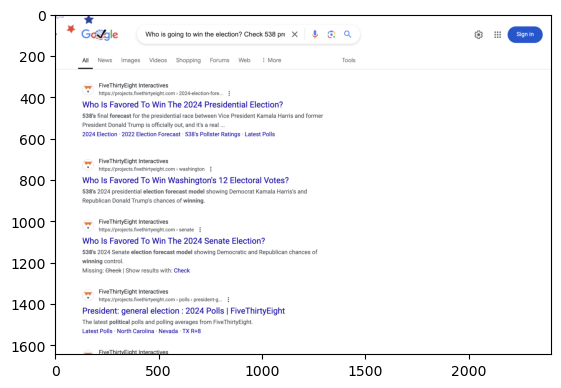

In [36]:
# screenshot
driver.save_screenshot("google.png")
img = Image.open('google.png')
plt.imshow(img)

### Practice: Understanding Chinese Social Media Recommendation Systems

One of my research projects focuses on understanding social media recommendation systems in China. The project focuses on when and how digital platform recommendation systems in China promote certain types content. To do so, we investigate the news aggregator in China called Toutiao, and we are currently scraping data from toutiao to answer our research question. 

Selenium is the main tool we are working with. With selenium we do the following: 

- Create a few sock puppets from selenium, which are basically a bunch of headless browsers in selenium 
- Direct these account to read different articles on Toutiao
- Investigate if reading more article of content X leads to more or less recommendations from accounts from the topic X.
- Collect data from reccomendations

This is a super complex research question. Creating sock puppets is particularly challenging. However, with the class you had today, you could understand the collecting data step. 

Below, you will see the class I created to collect data from toutiao. Your in-class/additional exercise is to work through the code, and try to use it to collect content from at least one page in toutiao. 

Let me know how it goes!

In [120]:
#import libraries from selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait # available since 2.4.0
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import ActionChains
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

# import other libraries
import time
import string
import pandas as pd
import numpy as np

In [121]:
# utils functions
def sleep_random_time(range_):
    '''
    :param range_: a tuple of the range of wait times
    ex: (0,30) would randomly sleep between 0 and 30 seconds
    '''
    if isinstance(range_, int):
        time.sleep(np.random.choice(range(range_)))
    elif isinstance(range_, tuple):
        min_time, max_time = range_
        if isinstance(min_time, float):
            min_time = int(math.ceil(min_time))
        if isinstance(max_time, float):
            max_time = int(math.floor(max_time))

        time.sleep(np.random.choice(range(min_time, max_time)))

In [37]:
# create a class
class ToutiaoBot():
    '''
    Returns a Bot to interact with the Toutiao Webpage
    
        :param 
            headless (bool): True spins up a headless browser. Default equals to False.  
    '''
    # create instance attributes -----------------

    def __init__(self, headless=False):
        if headless==True:
            options = Options()
            
            # HEADLESS OPTIONS
            options.add_argument('--headless=new')
            options.add_argument("window-size=1920,1080")
            self.driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), 
                                      options=options)
                
            # bypass OS security
            options.add_argument('--no-sandbox')
            # overcome limited resources
            options.add_argument('--disable-dev-shm-usage')
            # don't tell chrome that it is automated
            options.add_experimental_option("excludeSwitches", ["enable-automation"])
            options.add_experimental_option('useAutomationExtension', False)
            # disable images
            prefs = {"profile.managed_default_content_settings.images": 2}
            options.add_experimental_option("prefs", prefs)

            # Setting Capabilities
            capabilities = webdriver.DesiredCapabilities.CHROME.copy()
            capabilities['acceptSslCerts'] = True
            capabilities['acceptInsecureCerts'] = True

            self.driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), 
                                      options=options)
        else:
            self.driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    
    # method to close the bot -----------------------------
        
    def close(self):
        '''
        close the bot
        '''
        self.driver.close()
    
    # method to visit the home feed -----------------------------

    def go_home_feed(self):
        '''
        Sends the bot to the main toutiao homepage
        '''
        url = "https://www.toutiao.com/"
        # go to home toutia
        self.driver.get(url)
        # add some wait time
        self.element = WebDriverWait(self.driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '//*[@id="root"]/div/div[5]/div[2]/div[1]/div/a')))
    
    
    # method to open a article -----------------
    
    def go_article(self, article_url, time_read):
        '''
        sends the bot to a seed article
            :param 
                article_url: str, string wiht the full url for the article
                time_read: int, time to spend "reading" the article
        '''
        # go to seed vide
        self.driver.get(article_url)
        
        # add some wait time
        #self.element = WebDriverWait(self.driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 
         #                                                                               '.media-info .user-info')))
        
        # time to stay in the article
        time.sleep(time_read)
            
    
    # method to collect articles metadata. -------------------------------
    
    def collect_metadata_article(self, article_url, time_read):
        '''
        sends the bot to a see article and collects the url metadata
            :param 
                article_url: str, string wiht the full url for the article
                time_read: int, time to spend "reading" the article

        '''
        
        # navigate to the article
        self.go_article(article_url, time_read)
            
        
        # create a dictionary
        collector = dict()
        collector["video_url"] = article_url
        
        # scrape article information
        
        # author info
        try: 
            author_info = self.driver.find_element(By.CSS_SELECTOR, ".media-info .user-info")
            author_info_ = author_info.text.split("\n")
            collector["author_info_abbrv"] = author_info_[0]
            collector["author_info_full_name"] = author_info_[1]
        except:
            collector["author_info_abbrv"] = ""
            collector["author_info_full_name"] = ""
        # link to author
        try: 
            collector["author_link"] = author_info.find_element(By.CLASS_NAME, "user-avatar").get_attribute("href")
        except:
            collector["author_link"] = ""
        # title
        try:
            title = self.driver.find_element(By.CLASS_NAME, "article-content h1")
            collector["title"] = title.text
        except:
            collector["title"] =""
        # text
        try:
            text_boxes= self.driver.find_elements(By.CSS_SELECTOR, 'p[data-track]')
            collector["text"] = " ".join([t.text for t in text_boxes])
        except:
            collector["text"] = ""
        # reactions
        try:
            likes = self.driver.find_element(By.CLASS_NAME, "detail-like")
            comments = self.driver.find_element(By.CLASS_NAME, "detail-interaction-comment")
            collector["likes"] = likes.text
            collector["n_comments"] = comments.text
        except:
            collector["likes"] = ""
            collector["n_comments"] = ""  
        # add time of the publication
        try:
            time_= self.driver.find_element(By.CSS_SELECTOR, '.original-tag+ span')
            collector["time"] = time_.text
        except:
            collector["time"] = ""

        # return
        return collector
    
    
    ### method to collect related articles --------------------------------
    
    def collect_related_articles(self, article_url, time_read):
        '''
        sends the bot to a see article and collects the related articles reccomended from the same author
            :param 
                article_url: str, string wiht the full url for the article
                time_read: int, time to spend "reading" the article

        '''

        
        # navigate to the article
        self.go_article(article_url, time_read)
            
        
        # create a dictionary
        collector = dict()
        collector["video_url"] = article_url
        
        # collect related article
        try:
            related = self.driver.find_elements(By.CSS_SELECTOR, ".related-list-item")
            collector["link_related"]=[r.find_element(By.TAG_NAME, "a").get_attribute("href") for r in related]
            collector["text_related"] = [r.find_element(By.CLASS_NAME, "title").text for r in related]
        except: 
            collector["link_related"] =""
            collector["text_related"] =""
            
        return collector

    ### method to collect hot topics from a article --------------------------------
    
    def collect_hot_topic_from_article(self, article_url, time_read):
        '''
        sends the bot to a see article and collects the hot topics reccomended in the articles page
            :param 
                article_url: str, string wiht the full url for the article
                time_read: int, time to spend "reading" the article

        '''

        
        # navigate to the article
        self.go_article(article_url, time_read)
            
        
        # create a dictionary
        collector = dict()
        collector["video_url"] = article_url
        
        # collect related article
        try:
            related = self.driver.find_elements(By.CSS_SELECTOR, ".article-item")
            collector["link_hot_topic"]=[r.get_attribute("href") for r in related]
            collector["text_hot_topic"] = [r.get_attribute("aria-label") for r in related]
        except: 
            collector["link_hot_topic"] =""
            collector["text_text_topic"] =""
            
        return collector

    ### method to collect reccomendations from a article --------------------------------
    def collect_rec_from_article(self, article_url, time_read):
        '''
        sends the bot to a see article and collects the recommendations from the articles page
            :param 
                article_url: str, string wiht the full url for the article
                time_read: int, time to spend "reading" the article

        '''

        
        # navigate to the article
        self.go_article(article_url, time_read)
            
        
        # create a dictionary
        collector = dict()
        collector["video_url"] = article_url
        
        # scrool down to the bottom of the page
        time.sleep(np.random.choice(range(3, 7)))
        self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 
        time.sleep(np.random.choice(range(3, 7)))
        
        try: 
            rec = self.driver.find_elements(By.CSS_SELECTOR, ".feed-card-article-l .title")
            # collect reccomend
            if len(rec)>0:
                pass
            else:
                time.sleep(np.random.choice(range(3, 7)))
                self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 
                rec= self.driver.find_elements(By.CSS_SELECTOR, ".feed-card-article-l .title")

            try:
                collector["links"]=[r.get_attribute("href") for r in rec]
                collector["text"]=[r.get_attribute("aria-label") for r in rec]
                collector["title"]=[r.get_attribute("title") for r in rec]

                # code to clean later. some of the links are coming without text

                # clean text
                #text_=[r.get_attribute("aria-label") for r in rec]
                #text_=["" if text is None else str(text) for text in text_]

                # clean title
                #title_=[r.get_attribute("title") for r in rec]
                #title_=["" if text is None else str(text) for text in title_]

                # combine text and title
                #z = zip(text_, title_)
                #collector["title"]=["".join(z_) for z_ in z]
            except:
                collector["links"]=""
                collector["text"]=""
                collector["title"]=""
        except:
            pass
        
        return collector
    
     ### method to collect reccomendations from a article --------------------------------
    def collect_rec_from_home(self, user_id):
        '''
        sends the bot to home page and collects the recommendations

        '''

        # navigate to the article
        self.go_home_feed()
            
        
        # create a dictionary
        collector = dict()
        collector["user_id"] = user_id
        
        # scrool down to the bottom of the page
        time.sleep(np.random.choice(range(3, 7)))
        self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 
        time.sleep(np.random.choice(range(3, 7)))
        rec = self.driver.find_elements(By.CSS_SELECTOR, ".feed-card-article-l .title")

        
        # collect reccomend
        if len(rec)>0:
            pass
        else:
            time.sleep(np.random.choice(range(3, 7)))
            self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 
            rec = self.driver.find_elements(By.CSS_SELECTOR, ".feed-card-article-l .title")
                         
        try:
            collector["links"]=[r.get_attribute("href") for r in rec]
            collector["title"]=[r.get_attribute("aria-label") for r in rec]
            collector["text"]=[r.text for r in rec]
            
            # code to clean later. some of the links are coming without text
           
            # clean text
            #text_=[r.get_attribute("aria-label") for r in rec]
            #text_=["" if text is None else str(text) for text in text_]

            # clean title
            #title_=[r.get_attribute("title") for r in rec]
            #title_=["" if text is None else str(text) for text in title_]

            # combine text and title
            #z = zip(text_, title_)
            #collector["title"]=["".join(z_) for z_ in z]
        except:
            collector["links"]=""
            collector["text"]=""
            collector["title"]=""
        return collector
   
    ##### method to read articles on toutiao -------------------------
    
    def action_read_article(self, article_url, time_read):   
        '''
        sends the bot to a see article and collects the url metadata
            :param 
                article_url: str, string wiht the full url for the article
                time_read: int, time to spend "reading" the article

        '''
        
        # navigate to the article
        self.go_article(article_url, time_read)
        
        # replicate some common user behavior
        
        # 1 - move mouse to the author of the article
        try: 
            element = self.driver.find_element(By.CSS_SELECTOR, ".media-info .user-info")
            action = ActionChains(self.driver)
            action.move_to_element(element).pause(np.random.choice(range(10))).perform()
        except Exception as error: 
            print("Error occured when trying to move the mouse to the source", error)
        
        # 2 - move the mouse back to the main title
        try: 
            title_elem = self.driver.find_element(By.CLASS_NAME, "article-content h1")
            action = ActionChains(self.driver)
            action.move_to_element(title_elem).pause(np.random.choice(range(10))).perform()
        except Exception as error:
            print("Error occured when trying to move the mouse to the source", error)
        
        # 3 - scroll down through the article
        try:
        # get a proxy for the length of the article
            text_boxes= self.driver.find_elements(By.CSS_SELECTOR, 'p[data-track]')
            len_text = len(text_boxes)
            #scroll down and spend some time in the article
            for idx, par in enumerate(text_boxes):
                time.sleep(np.random.choice(range(3, 7)))
                self.driver.execute_script("arguments[0].scrollIntoView();", par)
                print(f'Reading the paragraph:{idx}')
        except Exception as error:
            print("An exception occurred:", error)         
        
        # 4 - scroll back to the title
        try:
            self.driver.execute_script("arguments[0].scrollIntoView();", title_elem)
        except Exception as error:
            print("An exception occurred:", error)         
            
            

In [38]:
# instantiate
bot = ToutiaoBot()

In [39]:
bot.go_home_feed()

In [124]:
# add code executing at least one method of this class.

In [227]:
!jupyter nbconvert _week-08_selenium.ipynb --to html --template classic


[NbConvertApp] Converting notebook _week-08_selenium.ipynb to html
[NbConvertApp] Writing 471230 bytes to _week-08_selenium.html
